In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading dataset file having 2 crore 40 lakh 58 thousand records

df = pd.read_csv('/content/drive/MyDrive/Projects/Netflix Recommendation/Copy of combined_data_1.txt.zip',
                 header=None, names=['Cust ID', 'Rating'], usecols=[0,1])
df

,Cust ID,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
df.dtypes

,0
Cust ID,object
Rating,float64


In [ ]:
df.isnull().sum()

,0
Cust ID,0
Rating,4499


In [ ]:
#get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count = df.isnull().sum()
movie_count = movie_count['Rating']
print(f'There are about {movie_count} number of movies in the dataset')

There are about 4499 number of movies in the dataset


In [ ]:
# To claculate how many customers we are having in the dataset
customer_count = df['Cust ID'].nunique()
print(f'There are total {customer_count} number of customers in the dataset')

There are total 475257 number of customers in the dataset


In [ ]:
# Total number of customers that we have after removing movie id from the column
print(f'Total number of customers that we have after removing movie id from the column are:- {customer_count - movie_count}')

Total number of customers that we have after removing movie id from the column are:- 470758


In [ ]:
#get the total number of ratings given by the customers
rating_count = df['Cust ID'].count() - movie_count
print(f'Ratings given by cutomers:- {rating_count}')

Ratings given by cutomers:- 24053764


In [ ]:
#To find out how many people have rated the movies as 1, 2, 3, 4, 5 stars ratings to the movies
stars = df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


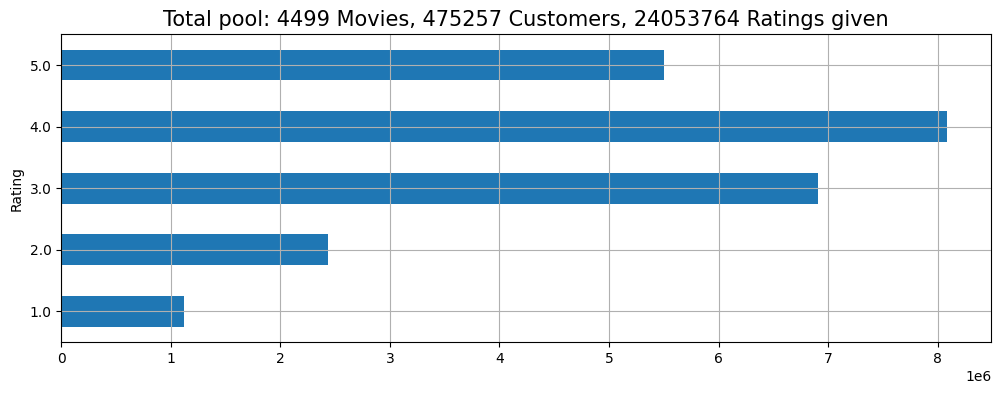

In [ ]:
ax=stars.plot(kind='barh', legend=False, figsize=(12,4))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} Ratings given', fontsize=15)
plt.grid(True)

In [ ]:
# Lets create a clear dataframe to find how many MovieId are there

movie_id = None
movie = []

for i in df['Cust ID']:
  if ':' in i:
    movie_id = int(i.replace(':', ''))
  movie.append(movie_id)

In [ ]:
movie
len(movie)

24058263

In [ ]:
df['MovieID'] = movie

In [ ]:
df.head()

,Cust ID,Rating,MovieID
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1


In [ ]:
# It excludes rows where the 'Rating' is NaN, to keep only the rows where the 'Rating' column is not null
df = df[df['Rating'].notna()]

In [ ]:
df.head()

,Cust ID,Rating,MovieID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust ID  object 
 1   Rating   float64
 2   MovieID  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [ ]:
df['Cust ID'] = df['Cust ID'].astype('int')

<ipython-input-19-b118edc033e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust ID'] = df['Cust ID'].astype('int')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust ID  int64  
 1   Rating   float64
 2   MovieID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
# Remove all the movies that have rated less
movie_summary = df.groupby('MovieID')['Rating'].agg(['count'])
movie_summary

,count
MovieID,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
# Setting a benchmark of movie rating to 60%
movie_benchmark = round(movie_summary['count'].quantile(0.6))
movie_benchmark

908

In [ ]:
# Movies rated less than benchmark
drop_movie_list = movie_summary[movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='MovieID', length=2699)

In [ ]:
# Movies left
4499 - len(drop_movie_list)

1800

In [ ]:
# We will remove all the users that have rated less movies
customer_summary = df.groupby('Cust ID')['Rating'].agg(['count'])
customer_summary

,count
Cust ID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(customer_summary['count'].quantile(0.6))
cust_benchmark

36

In [ ]:
drop_cust_list = customer_summary[customer_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust ID', length=282042)

In [ ]:
df = df[~df['MovieID'].isin(drop_movie_list)]  # ~ bitwise NOT operator
df = df[~df['Cust ID'].isin(drop_cust_list)]

In [ ]:
df.shape

(19695836, 3)



## Model Building

In [ ]:
# Dataframe containing movie names
df_title = pd.read_csv('/content/drive/MyDrive/Projects/Netflix Recommendation/Copy of movie_titles.csv',
                       encoding = "ISO-8859-1", header = None, usecols=[0,1,2],
                       names = ['MovieID','Year','Name'])
df_title

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
pip install numpy==1.24.4

In [ ]:
!pip install scikit-surprise

In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
### Working with only 100k rows
data = Dataset.load_from_df(df[['Cust ID', 'MovieID', 'Rating']][:100000], reader)
data

In [ ]:
# Creating SVD model
model = SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE'], cv=3)

{'test_rmse': array([1.02083761, 1.01829374, 1.01809231]),
 'fit_time': (1.5879175662994385, 4.907165050506592, 3.0987768173217773),
 'test_time': (0.3128345012664795, 0.4503512382507324, 0.8348896503448486)}

## Recommendation

In [ ]:
# Filter the dataset for a random specific user
user_rating = df[df['Cust ID'] == 1055714]
user_rating

,Cust ID,Rating,MovieID
42163,1055714,5.0,18
92227,1055714,4.0,28
210936,1055714,2.0,30
262254,1055714,5.0,57
279656,1055714,5.0,58
...,...,...,...
23805263,1055714,5.0,4432
23945242,1055714,4.0,4472
23977663,1055714,5.0,4479
24018719,1055714,5.0,4488


In [ ]:
# Find the number of unique movies rated by the user
movies_rated_by_user = user_rating['MovieID'].nunique()
movies_rated_by_user

340

In [ ]:
 #making a copy for each individual customer for the recomendation
 user_1055714 = df_title.copy()
 user_1055714

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
## Removing drop out movies
user_1055714 = user_1055714[~user_1055714['MovieID'].isin(drop_movie_list)]
user_1055714

,MovieID,Year,Name
2,3,1997.0,Character
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
# predict the score (rating) of that user

user_1055714['Estimate Ratings'] = user_1055714['MovieID'].apply(lambda x: model.predict(1055714, x).est)

<ipython-input-42-5cd603121e3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1055714['Estimate Ratings'] = user_1055714['MovieID'].apply(lambda x: model.predict(1055714, x).est)


In [ ]:
user_1055714

,MovieID,Year,Name,Estimate Ratings
2,3,1997.0,Character,3.235950
4,5,2004.0,The Rise and Fall of ECW,3.862225
5,6,1997.0,Sick,3.077560
7,8,2004.0,What the #$*! Do We Know!?,3.542144
15,16,1996.0,Screamers,3.265406
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.719119
17766,17767,2004.0,Fidel Castro: American Experience,3.719119
17767,17768,2000.0,Epoch,3.719119
17768,17769,2003.0,The Company,3.719119


In [ ]:
user_1055714.sort_values('Estimate Ratings', ascending=False)

,MovieID,Year,Name,Estimate Ratings
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.258010
27,28,2002.0,Lilo and Stitch,3.963783
29,30,2003.0,Something's Gotta Give,3.940911
17,18,1994.0,Immortal Beloved,3.915399
4,5,2004.0,The Rise and Fall of ECW,3.862225
...,...,...,...,...
2,3,1997.0,Character,3.235950
16,17,2005.0,7 Seconds,3.181965
5,6,1997.0,Sick,3.077560
23,24,1981.0,My Bloody Valentine,2.996788


In [ ]:
top5_movies=user_1055714.sort_values('Estimate Ratings', ascending=False).head(5)
top5_movies

,MovieID,Year,Name,Estimate Ratings
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,4.258010
27,28,2002.0,Lilo and Stitch,3.963783
29,30,2003.0,Something's Gotta Give,3.940911
17,18,1994.0,Immortal Beloved,3.915399
4,5,2004.0,The Rise and Fall of ECW,3.862225
